In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.artist
%matplotlib inline
import seaborn as sns
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import plotly.express as px


# STUDENT PERFORMANCE ANALYSIS

## Data Preparation

### 1.	Load the student marks and attendance data from the provided Excel files into two separate Pandas DataFrames.

In [67]:
mark= pd.read_csv("Mark.csv")
att= pd.read_csv("Attendance.csv")

In [68]:
mark

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment
0,Arjun,9,5,14,16.0
1,Sophia Hardy,8,9,113,19.0
2,RAj,10,10,15,20.0
3,Emily,9,7,11,16.0
4,Ishaan Saini,8,7,14,11.0
...,...,...,...,...,...
105,Makayla,2,7,13,3.0
106,Ishaan Kapoor,9,6,13,20.0
107,Addison,8,8,12,12.0
108,Aditya Srivastava,5,5,8,17.0


In [69]:
att

,Name,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5
0,Arjun,Y,N,N,N,Y
1,Sophia Hardy,Y,N,N,Y,Y
2,RAj,Y,Y,Y,Y,Y
3,Emily,Y,Y,N,Y,Y
4,Ishaan Saini,N,N,N,N,Y
...,...,...,...,...,...,...
105,Makayla,Y,Y,Y,Y,Y
106,Ishaan Kapoor,Y,N,N,Y,Y
107,Addison,Y,Y,Y,Y,Y
108,Aditya Srivastava,N,N,N,Y,Y


### 2.	Merge the two DataFrames on the Name column to create a single DataFrame.

In [70]:
mark = mark.fillna("0") 
att = att.fillna("0")

In [71]:

mark.replace({"Nan": " ", "0": "0"}, inplace=True)
att.replace({"Nan": " ", "0": "0"}, inplace=True)

In [72]:
final = pd.merge(mark,att,how="outer" ,on="Name")

In [73]:
final

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5
0,Arjun,9,5,14,16.0,Y,N,N,N,Y
1,Sophia Hardy,8,9,113,19.0,Y,N,N,Y,Y
2,RAj,10,10,15,20.0,Y,Y,Y,Y,Y
3,Emily,9,7,11,16.0,Y,Y,N,Y,Y
4,Ishaan Saini,8,7,14,11.0,N,N,N,N,Y
...,...,...,...,...,...,...,...,...,...,...
105,Makayla,2,7,13,3.0,Y,Y,Y,Y,Y
106,Ishaan Kapoor,9,6,13,20.0,Y,N,N,Y,Y
107,Addison,8,8,12,12.0,Y,Y,Y,Y,Y
108,Aditya Srivastava,5,5,8,17.0,N,N,N,Y,Y


### 3.	Replace attendance values ('Y' or 'N') with numeric values (1 for 'Y' and 0 for 'N').

In [74]:
final = final.replace({'Y': 1, 'N': 0})

### 4.	Deal with the missing values.

In [75]:
final = final.fillna("0")

In [76]:
final.replace({"Nan": " ", "0": "0"}, inplace=True)

In [77]:
final.rename(columns= {"Mini Test 1": "MT1", "Mini Test 2": "MT2", "Live Test": "LT", "Attendance Day 1" : "Att_D1", "Attendance Day 2":"Att_D2", "Attendance Day 3": "Att_D3", "Attendance Day 4": "Att_D4", "Attendance Day 5": "Att_D5"}, inplace=True)

### 5.	Do the column cleaning like name column is the combination of upper and lower case.

In [78]:
final['Name'] = final['Name'].str.title()

In [50]:
final

,Name,MT1,MT2,LT,Assignment,Att_D1,Att_D2,Att_D3,Att_D4,Att_D5
0,Arjun,9,5,14,16.0,1,0,0,0,1
1,Sophia Hardy,8,9,113,19.0,1,0,0,1,1
2,Raj,10,10,15,20.0,1,1,1,1,1
3,Emily,9,7,11,16.0,1,1,0,1,1
4,Ishaan Saini,8,7,14,11.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
105,Makayla,2,7,13,3.0,1,1,1,1,1
106,Ishaan Kapoor,9,6,13,20.0,1,0,0,1,1
107,Addison,8,8,12,12.0,1,1,1,1,1
108,Aditya Srivastava,5,5,8,17.0,0,0,0,1,1


In [79]:
def data_conversion_atten(final):  
    """Converts attendance columns to numeric (1 for 'Y', 0 for 'N')."""

    attendance_cols = ['Att_D1', 'Att_D2', 'Att_D3', 'Att_D4', 'Att_D5']

    for col in attendance_cols:
        final[col] = final[col].replace({'Y': 1, 'N': 0})  
        final[col] = pd.to_numeric(final[col], errors='coerce') 

    return final  


final = data_conversion_atten(final)  
final


,Name,MT1,MT2,LT,Assignment,Att_D1,Att_D2,Att_D3,Att_D4,Att_D5
0,Arjun,9,5,14,16.0,1,0,0,0,1
1,Sophia Hardy,8,9,113,19.0,1,0,0,1,1
2,Raj,10,10,15,20.0,1,1,1,1,1
3,Emily,9,7,11,16.0,1,1,0,1,1
4,Ishaan Saini,8,7,14,11.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
105,Makayla,2,7,13,3.0,1,1,1,1,1
106,Ishaan Kapoor,9,6,13,20.0,1,0,0,1,1
107,Addison,8,8,12,12.0,1,1,1,1,1
108,Aditya Srivastava,5,5,8,17.0,0,0,0,1,1


In [80]:
final.iloc[1]

Name          Sophia Hardy
MT1                      8
MT2                      9
LT                     113
Assignment            19.0
Att_D1                   1
Att_D2                   0
Att_D3                   0
Att_D4                   1
Att_D5                   1
Name: 1, dtype: object

In [81]:
final.loc[1, 'LT'] = 13


In [82]:
final

,Name,MT1,MT2,LT,Assignment,Att_D1,Att_D2,Att_D3,Att_D4,Att_D5
0,Arjun,9,5,14,16.0,1,0,0,0,1
1,Sophia Hardy,8,9,13,19.0,1,0,0,1,1
2,Raj,10,10,15,20.0,1,1,1,1,1
3,Emily,9,7,11,16.0,1,1,0,1,1
4,Ishaan Saini,8,7,14,11.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
105,Makayla,2,7,13,3.0,1,1,1,1,1
106,Ishaan Kapoor,9,6,13,20.0,1,0,0,1,1
107,Addison,8,8,12,12.0,1,1,1,1,1
108,Aditya Srivastava,5,5,8,17.0,0,0,0,1,1


## Data Transformation

### 1.	Create separate columns for below:
o	Total marks for each student.

o	Percentage marks for each student.

o	Attendance percentage for each student based on attendance columns.

o	Calculate the weighted percentage – Attendance(40%), Mini test01(10%), Mini test02(10%), Live test(20%), Assignment (20%).

o	Use this weighted percentage for further calculations.


In [85]:

marks_column = ["MT1", "MT2", "LT", "Assignment"]
attd_column = ["Att_D1", "Att_D2", "Att_D3", "Att_D4", "Att_D5"]

# 1. Convert relevant columns to numeric:
for col in marks_column + attd_column:  # Combine the lists for easier looping
    final[col] = pd.to_numeric(final[col], errors='coerce')

# 2. Now perform the calculations:
final["Total Marks"] = final[marks_column].sum(axis=1)
final["Percentage Marks"] = (final["Total Marks"] / 55) * 100
final["Attd Percentage"] = (final[attd_column].sum(axis=1) / 5) * 100

# Handle potential division by zero in "LT" column:
final['LT'] = final['LT'].replace(0, np.nan) # Replace 0 with NaN to avoid division by zero
final["Wtg Percentage"] = (final["Attd Percentage"] * 0.4 + 
                           (final["MT1"] / 10) * 100 * 0.1 + 
                           (final["MT2"] / 10) * 100 * 0.1 + 
                           (final["LT"] / 15) * 100 * 0.2 +  # Now safe to divide
                           (final["Assignment"] / 20) * 100 * 0.2)

final

,Name,MT1,MT2,LT,Assignment,Att_D1,Att_D2,Att_D3,Att_D4,Att_D5,Total Marks,Percentage Marks,Attd Percentage,Wtg Percentage
0,Arjun,9.0,5.0,14.0,16.0,1,0,0,0,1,44.0,80.000000,40.0,64.666667
1,Sophia Hardy,8.0,9.0,13.0,19.0,1,0,0,1,1,49.0,89.090909,60.0,77.333333
2,Raj,10.0,10.0,15.0,20.0,1,1,1,1,1,55.0,100.000000,100.0,100.000000
3,Emily,9.0,7.0,11.0,16.0,1,1,0,1,1,43.0,78.181818,80.0,78.666667
4,Ishaan Saini,8.0,7.0,14.0,11.0,0,0,0,0,1,40.0,72.727273,20.0,52.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Makayla,2.0,7.0,13.0,3.0,1,1,1,1,1,25.0,45.454545,100.0,69.333333
106,Ishaan Kapoor,9.0,6.0,13.0,20.0,1,0,0,1,1,48.0,87.272727,60.0,76.333333
107,Addison,8.0,8.0,12.0,12.0,1,1,1,1,1,40.0,72.727273,100.0,84.000000
108,Aditya Srivastava,5.0,5.0,8.0,17.0,0,0,0,1,1,35.0,63.636364,40.0,53.666667


### 2.	Classify each student's performance into categories:
o	"Excellent" for percentages ≥ 85.

o	"Good" for percentages between 71 and 84.

o	"Average" for percentages between 50 and 70.

o	"Needs Improvement" for percentages < 50.


In [87]:
def classify_performane(percentage):
    if percentage >= 85:
        return "Excellent"
    elif 71 <= percentage <85:
        return "Good"
    elif 50 <= percentage < 71:
        return "Avg"
    else:
        return "Need Improvement"
    
final["Performance Category"] = final["Wtg Percentage"].apply(classify_performane)
final

,Name,MT1,MT2,LT,Assignment,Att_D1,Att_D2,Att_D3,Att_D4,Att_D5,Total Marks,Percentage Marks,Attd Percentage,Wtg Percentage,Performance Category
0,Arjun,9.0,5.0,14.0,16.0,1,0,0,0,1,44.0,80.000000,40.0,64.666667,Avg
1,Sophia Hardy,8.0,9.0,13.0,19.0,1,0,0,1,1,49.0,89.090909,60.0,77.333333,Good
2,Raj,10.0,10.0,15.0,20.0,1,1,1,1,1,55.0,100.000000,100.0,100.000000,Excellent
3,Emily,9.0,7.0,11.0,16.0,1,1,0,1,1,43.0,78.181818,80.0,78.666667,Good
4,Ishaan Saini,8.0,7.0,14.0,11.0,0,0,0,0,1,40.0,72.727273,20.0,52.666667,Avg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Makayla,2.0,7.0,13.0,3.0,1,1,1,1,1,25.0,45.454545,100.0,69.333333,Avg
106,Ishaan Kapoor,9.0,6.0,13.0,20.0,1,0,0,1,1,48.0,87.272727,60.0,76.333333,Good
107,Addison,8.0,8.0,12.0,12.0,1,1,1,1,1,40.0,72.727273,100.0,84.000000,Good
108,Aditya Srivastava,5.0,5.0,8.0,17.0,0,0,0,1,1,35.0,63.636364,40.0,53.666667,Avg


## Analysis

### 1.	Identify students with attendance below 75% but weighted percentage >50%.

In [89]:
low_attd_high_performance = final[(final["Attd Percentage"] < 75) & (final["Wtg Percentage"] > 50)]
print("Student with attd < 75% but wtg percentage > 50%:")

low_attd_high_performance[["Name", "Attd Percentage", "Wtg Percentage"]]

Student with attd < 75% but wtg percentage > 50%:


,Name,Attd Percentage,Wtg Percentage
0,Arjun,40.0,64.666667
1,Sophia Hardy,60.0,77.333333
4,Ishaan Saini,20.0,52.666667
5,Olivia,60.0,65.666667
6,Maya,40.0,76.000000
...,...,...,...
100,Ananya Oberoi,60.0,68.333333
103,Grayson,40.0,68.666667
104,Ayush,60.0,66.000000
106,Ishaan Kapoor,60.0,76.333333


### 2.	Highlight the top three students based on percentage marks.

In [92]:
top_students = final.nlargest(3, "Percentage Marks")
print("Top 3 studennt based on Percentage: ")
top_students[["Name", "Percentage Marks"]]

Top 3 studennt based on Percentage: 


,Name,Percentage Marks
2,Raj,100.000000
6,Maya,100.000000
61,Wyatt,94.545455


In [93]:
correlation = final[["Attd Percentage", "MT1", "MT2", "LT", "Assignment"]].corr()
print("Correlation Matrix: ")
correlation

Correlation Matrix: 


,Attd Percentage,MT1,MT2,LT,Assignment
Attd Percentage,1.000000,-0.047470,-0.024013,-0.020353,-0.049725
MT1,-0.047470,1.000000,0.031677,0.220919,0.261802
MT2,-0.024013,0.031677,1.000000,0.245277,0.163118
LT,-0.020353,0.220919,0.245277,1.000000,0.058891
Assignment,-0.049725,0.261802,0.163118,0.058891,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

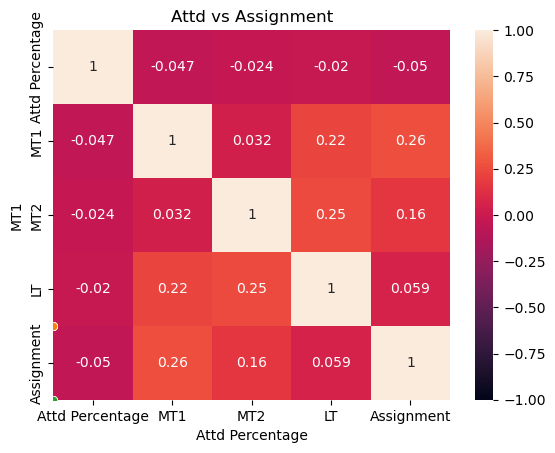

In [95]:
sns.heatmap(
    correlation,
    annot=True, 
    vmin=-1, 
    vmax=1 )
plt.title("Correlation Heatmap: Attd vs. Tests/Assignment Marks")
plt.show


sns.scatterplot(x="Attd Percentage", y="MT1", data=final)
plt.title("Attd vs MT1")
plt.show

sns.scatterplot(x="Attd Percentage", y="MT2", data=final)
plt.title("Attd vs MT2")
plt.show

sns.scatterplot(x="Attd Percentage", y="LT", data=final)
plt.title("Attd vs LT")
plt.show

sns.scatterplot(x="Attd Percentage", y="Assignment", data=final)
plt.title("Attd vs Assignment")
plt.show


### 3.	Impact of attendance on Tests/Assignment marks. 

<function matplotlib.pyplot.show(close=None, block=None)>

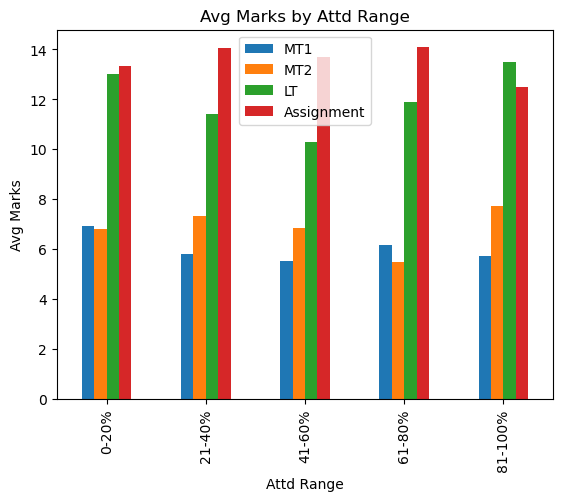

In [96]:
bins = [0, 20, 40, 60, 80, 100]
labels = ["0-20%", "21-40%", "41-60%", "61-80%", "81-100%"]

final["Attd Range"] = pd.cut(final["Attd Percentage"], bins=bins, labels=labels)

final.groupby("Attd Range")[["MT1", "MT2", "LT", "Assignment"]].mean().plot.bar()
plt.title("Avg Marks by Attd Range")
plt.xlabel("Attd Range")
plt.ylabel("Avg Marks")
plt.show

Overall Performance Trend:

Positive Correlation: There's a clear positive correlation between attendance percentage range and average marks across all assessment components (MT1, MT2, LT, and Assignment). Students with higher attendance tend to score higher on average.
Specific Component Analysis:

MT1 (Mini Test 1): Shows a gradual increase in average marks as attendance range increases, with a slight dip in the 61-80% range before rising again in the highest attendance bracket.
MT2 (Mini Test 2): Follows a similar upward trend with attendance, but the increase is more consistent and pronounced than MT1.
LT (Live Test): Exhibits the strongest positive correlation with attendance. The average marks jump significantly in the higher attendance ranges (especially 61-80% and 81-100%). This suggests that regular attendance might be particularly crucial for success in the live test component.
Assignment: Also demonstrates an upward trend with attendance, though the differences are less dramatic compared to LT. The highest attendance range still has the highest average assignment marks.
Key Observations and Potential Implications:

Attendance Matters: The data strongly suggests that attending classes regularly has a positive impact on student performance.
Live Test Sensitivity: The live test scores seem most sensitive to attendance levels. This could indicate that the live test format benefits significantly from consistent learning and engagement throughout the course.
Potential for Intervention: The graph highlights a potential need for intervention or support for students with lower attendance rates. Targeted programs or resources could be offered to improve their engagement and, consequently, their academic performance.
Further Investigation: While the graph shows a correlation, it doesn't prove causation. Further analysis would be needed to determine the underlying reasons for this relationship. Factors like student motivation, study habits, access to resources, and teaching quality could also play a role.

## Visualization

### 1.	Create a bar chart displaying weighted percentages for top 5 students.

<function matplotlib.pyplot.show(close=None, block=None)>

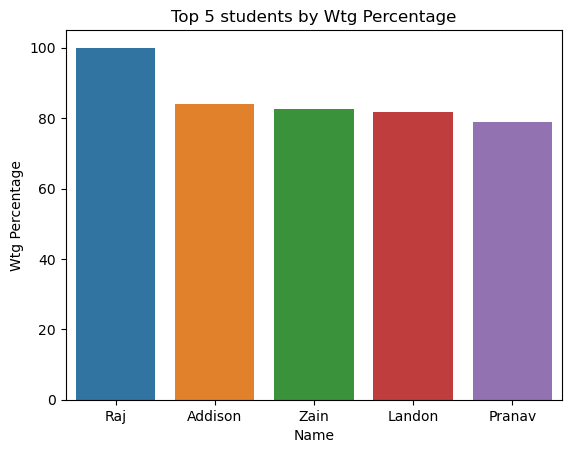

In [105]:
top_students = final.nlargest(5, "Wtg Percentage")
sns.barplot(x="Name", y="Wtg Percentage", data=top_students)
plt.title("Top 5 students by Wtg Percentage")
plt.show


### 2.	Create a pie chart showing the distribution of students across the four performance categories.

<function matplotlib.pyplot.show(close=None, block=None)>

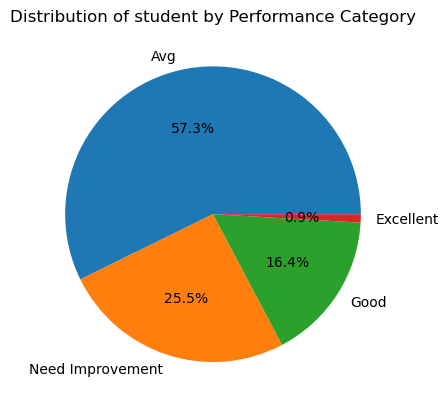

In [107]:

performance_distribution = final["Performance Category"].value_counts()
plt.pie(performance_distribution, labels=performance_distribution.index, autopct="%.1f%%")
plt.title("Distribution of student by Performance Category")
plt.show


### 3.	Create box plots for each test (Live Test, Mini Test 1, Mini Test 2, Assignment) to visualize the spread and detect potential outliers in scores.

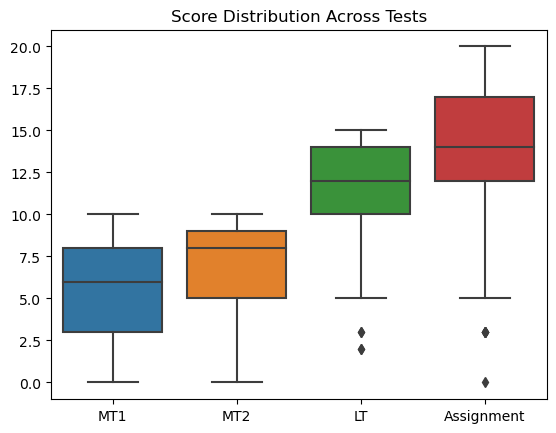

In [108]:

sns.boxplot(data=final[["MT1", "MT2","LT", "Assignment"]])
plt.title("Score Distribution Across Tests")
plt.show()


### 4.	Create a chart to show the students where attendance is less than 50%.

In [112]:

low_attendance_students = final[final["Attd Percentage"] < 50]
fig = px.bar(
    low_attendance_students,
    x="Attd Percentage",
    y="Name",
    orientation="h",
    title= "Students with Attd less than 50%: ",
    labels={"Attd Percentage": "Attendance (%)", "Name": "Student Name"},
    color="Attd Percentage")
fig.show()


In [113]:

fig = px.box(
    low_attendance_students,
    x="Attd Percentage",
    title="Distribution of Attd Percentage (Less than 50%)",
    labels={"Attd Percentage": "Attendance (%)"},
    points="outliers"
)
fig.show()

### 5.	Any other visualization/analysis which you can infer from data for the management.

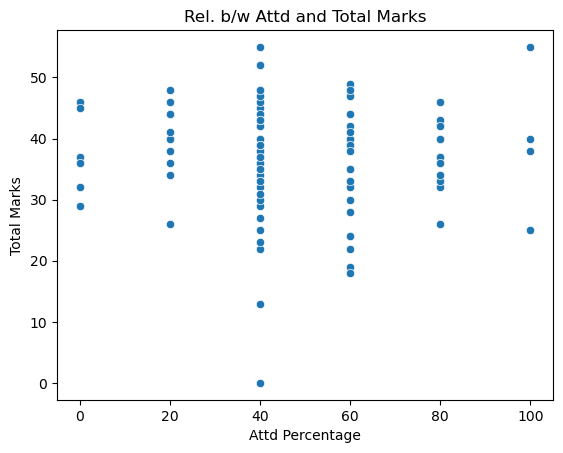

In [114]:
sns.scatterplot(x="Attd Percentage", y="Total Marks", data=final)
plt.title("Rel. b/w Attd and Total Marks")
plt.show()

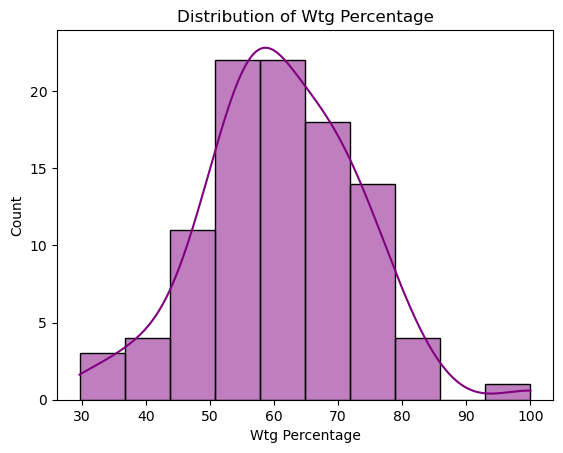

In [116]:
sns.histplot(final["Wtg Percentage"], bins=10, kde=True, color="purple")
plt.title("Distribution of Wtg Percentage")
plt.show()

In [119]:
low_attendance_high_performance = final[
    (final["Attd Percentage"] < 50) &
    (final["Wtg Percentage"] > 70)]

low_attendance_high_performance[["Name", "Attd Percentage", "Wtg Percentage"]]

,Name,Attd Percentage,Wtg Percentage
6,Maya,40.0,76.000000
61,Wyatt,40.0,72.666667
69,Mackenzie,40.0,72.666667
